In [1]:
!pip install plotly
import plotly.express as px

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import glob
import os

## 1. Load data from csv files

In [3]:
# Create a list of filepaths using glob and os.path.join

path = r'D:\Data\Projects\Google\Cyclistic\source'
all_files  = glob.glob(os.path.join(path, "*.csv"))  # list of filepath
all_files

['D:\\Data\\Projects\\Google\\Cyclistic\\source\\202007-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202008-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202009-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202010-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202011-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202012-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202101-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202102-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202103-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202104-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202105-divvy-tripdata.csv',
 'D:\\Data\\Projects\\Google\\Cyclistic\\source\\202106-divvy-tripdata.csv']

In [4]:
# Loop through the filepath list to read csv files and append to merged_df

merged_df = pd.DataFrame()
for f in all_files:
    df_each_file = pd.read_csv(f)
    merged_df = merged_df.append(df_each_file, ignore_index=True)

merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.911722,-87.626804,41.907993,-87.631501,member


In [5]:
merged_df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4460146,CB282292CCFCE74F,electric_bike,2021-06-14 00:17:31,2021-06-14 00:56:46,Wells St & Polk St,SL-011,NaN,NaN,41.872412,-87.633715,41.880000,-87.620000,casual
4460147,47BD346FAFB9BE6D,classic_bike,2021-06-30 17:35:10,2021-06-30 17:43:20,Clark St & Chicago Ave,13303,Kingsbury St & Kinzie St,KA1503000043,41.896750,-87.630890,41.889177,-87.638506,member
4460148,52467C23D17C6AFE,classic_bike,2021-06-13 19:24:30,2021-06-13 19:34:11,Indiana Ave & 26th St,TA1307000005,State St & 19th St,SL-013,41.845687,-87.622481,41.856594,-87.627542,member
4460149,7DF6D74420D7D9E6,electric_bike,2021-06-08 15:44:28,2021-06-08 16:15:01,Clark St & Chicago Ave,13303,NaN,NaN,41.896485,-87.630608,41.940000,-87.710000,member
4460150,0C01F8BA99E512E5,electric_bike,2021-06-03 16:18:38,2021-06-03 16:47:49,Clark St & Chicago Ave,13303,NaN,NaN,41.896596,-87.630868,41.940000,-87.710000,member


## 2. Data source summary

In [6]:
def explore_stats(df):
    nrows, ncols = df.shape
    print("Total records:", nrows)
    print("Total columns:", ncols)
    
    # create columns list and check dtype
    feature = []
    type_lst = []
    for key, value in df.dtypes.iteritems():
        feature.append(key)
        type_lst.append(value)
        
    # check distinct value
    distinct = []
    for i in df.columns:
        num_distinct = df[i].unique().size
        distinct_pct = num_distinct / nrows * 100
        distinct.append("{} ({:0.2f}%)".format(num_distinct, distinct_pct))
        
    # check null values
    null = []
    for i in df.columns:
        num_null = df[i].isna().sum()
        null_pct = num_null / nrows * 100
        null.append("{} ({:0.2f}%)".format(num_null, null_pct))
        
    # check negative values
    negative = []
    for i in df.columns:
        try:
            num_neg = (df[i].astype('float') < 0).sum()
            neg_pct = num_neg / nrows * 100
            negative.append("{} ({:0.2f}%)".format(num_neg, neg_pct))
        except:
            negative.append(str(0) + " (0%)")
            continue
            
    # check zeros
    zeros = []
    for i in df.columns:
        try:
            num_zero = (df[i] == 0).sum()
            zero_pct = num_zero / nrows * 100
            zeros.append("{} ({:0.2f}%)".format(num_zero, zero_pct))
        except:
            zeros.append(str(0) + " (0%)")
            continue
            
    # check stats measure
    stats = df.describe().transpose()
    
    # put measures into a dataframe
    data = {'feature': feature,
           'data_type': type_lst,
           'n_distinct': distinct,
           'n_missing': null,
           'n_negative': negative,
           'n_zeros': zeros}
    for y in stats.columns:
        data[y] = []
        for x in df.columns:
            try:
                data[y].append(stats.loc[x, y])
            except:
                data[y].append(0.0)
    
    df_stats = pd.DataFrame(data)
    
    return df_stats

In [7]:
data_dict = explore_stats(merged_df)
data_dict

Total records: 4460151
Total columns: 13


,feature,data_type,n_distinct,n_missing,n_negative,n_zeros,count,mean,std,min,25%,50%,75%,max
0,ride_id,object,4459942 (100.00%),0 (0.00%),0 (0%),0 (0.00%),0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
1,rideable_type,object,3 (0.00%),0 (0.00%),0 (0%),0 (0.00%),0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
2,started_at,object,3813396 (85.50%),0 (0.00%),0 (0%),0 (0.00%),0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
3,ended_at,object,3801221 (85.23%),0 (0.00%),0 (0%),0 (0.00%),0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
4,start_station_name,object,713 (0.02%),282068 (6.32%),0 (0%),0 (0.00%),0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
5,start_station_id,object,1361 (0.03%),282694 (6.34%),0 (0%),0 (0.00%),0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
6,end_station_name,object,714 (0.02%),315109 (7.06%),0 (0%),0 (0.00%),0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
7,end_station_id,object,1361 (0.03%),315570 (7.08%),0 (0%),0 (0.00%),0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
8,start_lat,float64,322245 (7.22%),0 (0.00%),0 (0.00%),0 (0.00%),4460151.0,41.903069,0.043921,41.64,41.882134,41.899186,41.929546,42.08
9,start_lng,float64,310159 (6.95%),0 (0.00%),4460151 (100.00%),0 (0.00%),4460151.0,-87.644438,0.026051,-87.87,-87.658617,-87.640826,-87.626904,-87.52


## 3. Data Cleaning

### 3.1. Cleaning datetime

In [8]:
# Convert started_at and ended_at into datetime

merged_df['started_at'] = pd.to_datetime(merged_df['started_at'])
merged_df['ended_at'] = pd.to_datetime(merged_df['ended_at'])
print(merged_df['started_at'].dtype)
print(merged_df['ended_at'].dtype)

datetime64[ns]
datetime64[ns]


#### 3.1.1. Create new time features

In [9]:
# Calculate the duration of each ride

merged_df['ride_duration'] = (merged_df['ended_at'] - merged_df['started_at']) / pd.Timedelta(minutes=1)
merged_df['ride_duration']

0           3.833333
1          23.783333
2           7.250000
3          20.933333
4           5.133333
             ...    
4460146    39.250000
4460147     8.166667
4460148     9.683333
4460149    30.550000
4460150    29.183333
Name: ride_duration, Length: 4460151, dtype: float64

In [10]:
# Create column of date, hour, and day of week from starting time

merged_df['starting_hour'] = merged_df['started_at'].dt.hour
merged_df['starting_weekday'] = merged_df['started_at'].dt.dayofweek
merged_df['starting_day'] = merged_df['started_at'].dt.day
merged_df['starting_month'] = merged_df['started_at'].dt.month

In [11]:
explore_stats(merged_df.loc[:, 'ride_duration':'starting_month'])

Total records: 4460151
Total columns: 5


,feature,data_type,n_distinct,n_missing,n_negative,n_zeros,count,mean,std,min,25%,50%,75%,max
0,ride_duration,float64,27591 (0.62%),0 (0.00%),9872 (0.22%),480 (0.01%),4460151.0,23.812989,357.222784,-29049.966667,7.516667,13.633333,25.133333,55944.15
1,starting_hour,int64,24 (0.00%),0 (0.00%),0 (0.00%),56680 (1.27%),4460151.0,14.351417,4.805990,0.000000,11.000000,15.000000,18.000000,23.00
2,starting_weekday,int64,7 (0.00%),0 (0.00%),0 (0.00%),546895 (12.26%),4460151.0,3.218773,1.993379,0.000000,1.000000,3.000000,5.000000,6.00
3,starting_day,int64,31 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),4460151.0,15.581700,8.749800,1.000000,8.000000,16.000000,23.000000,31.00
4,starting_month,int64,12 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),4460151.0,7.000743,2.504239,1.000000,5.000000,7.000000,9.000000,12.00


####  3.1.2. Remove rides with 0 and negative duration

In [12]:
merged_df_v2 = merged_df[merged_df['ride_duration'] > 0]  # drop 11,096 rows
merged_df_v2.shape

(4449799, 18)

In [13]:
# version 2 has new features of time, and all the records with invalid time (negative or zero ride length) are removed

merged_df_v2.to_csv('D:\Data\Projects\Google\Cyclistic\cyclistic_data_20210811_v2.csv', index=False)

### 3.2. Remove rows with missing values

In [14]:
# All the rides that do not have starting station or ending station are regarded invalid rides, therefore removed
# drop 435,222 records

merged_df_v3 = merged_df_v2.dropna(axis=0, how='any', subset=['start_station_name', 
                                                              'end_station_name', 'start_station_id', 'end_station_id'])
explore_stats(merged_df_v3).sort_values(by=['data_type'])

Total records: 4015456
Total columns: 18


,feature,data_type,n_distinct,n_missing,n_negative,n_zeros,count,mean,std,min,25%,50%,75%,max
17,starting_month,int64,12 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),4015456.0,7.031257,2.469539,1.000000,5.000000,7.000000,9.000000,12.000000
15,starting_weekday,int64,7 (0.00%),0 (0.00%),0 (0.00%),491613 (12.24%),4015456.0,3.225143,1.994459,0.000000,2.000000,3.000000,5.000000,6.000000
14,starting_hour,int64,24 (0.00%),0 (0.00%),0 (0.00%),48870 (1.22%),4015456.0,14.343862,4.775385,0.000000,11.000000,15.000000,18.000000,23.000000
16,starting_day,int64,31 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),4015456.0,15.545524,8.755667,1.000000,8.000000,15.000000,23.000000,31.000000
13,ride_duration,float64,25648 (0.64%),0 (0.00%),0 (0.00%),0 (0.00%),4015456.0,26.462547,252.383323,0.016667,7.716667,13.883333,25.500000,55944.150000
11,end_lng,float64,315010 (7.84%),0 (0.00%),4015456 (100.00%),0 (0.00%),4015456.0,-87.643686,0.024010,-87.774770,-87.655859,-87.639936,-87.627026,-87.524517
10,end_lat,float64,340454 (8.48%),0 (0.00%),0 (0.00%),0 (0.00%),4015456.0,41.904309,0.041095,41.648501,41.882830,41.898969,41.929143,42.075511
9,start_lng,float64,280262 (6.98%),0 (0.00%),4015456 (100.00%),0 (0.00%),4015456.0,-87.643422,0.023862,-87.774704,-87.655486,-87.639540,-87.626804,-87.528231
8,start_lat,float64,292017 (7.27%),0 (0.00%),0 (0.00%),0 (0.00%),4015456.0,41.904000,0.040986,41.648500,41.882664,41.898587,41.928865,42.064891
3,ended_at,datetime64[ns],3460024 (86.17%),0 (0.00%),0 (0%),0 (0.00%),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# version 3 has rides with missing starting or ending station removed

merged_df_v3.to_csv('D:\Data\Projects\Google\Cyclistic\cyclistic_data_20210816_v3.csv', index=False)

### 3.3. Calculate latitude and longitude of starting and ending stations

In [16]:
# Calculate mean of longitude and latitude grouped by station names to achieve approximate long and lat of that station

merged_df_v4 = merged_df_v3
merged_df_v4['mean_start_lat'] = merged_df_v4.groupby('start_station_name')['start_lat'].transform('mean')
merged_df_v4['mean_start_lng'] = merged_df_v4.groupby('start_station_name')['start_lng'].transform('mean')
merged_df_v4['mean_end_lat'] = merged_df_v4.groupby('end_station_name')['end_lat'].transform('mean')
merged_df_v4['mean_end_lng'] = merged_df_v4.groupby('end_station_name')['end_lng'].transform('mean')

C:\Users\Lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [17]:
explore_stats(merged_df_v4[['mean_start_lat', 'mean_start_lng', 'mean_end_lat', 'mean_end_lng']])

Total records: 4015456
Total columns: 4


,feature,data_type,n_distinct,n_missing,n_negative,n_zeros,count,mean,std,min,25%,50%,75%,max
0,mean_start_lat,float64,702 (0.02%),0 (0.00%),0 (0.00%),0 (0.00%),4015456.0,41.904000,0.040986,41.648532,41.882668,41.898580,41.928890,42.064844
1,mean_start_lng,float64,706 (0.02%),0 (0.00%),4015456 (100.00%),0 (0.00%),4015456.0,-87.643422,0.023862,-87.774599,-87.655484,-87.639518,-87.626805,-87.528306
2,mean_end_lat,float64,708 (0.02%),0 (0.00%),0 (0.00%),0 (0.00%),4015456.0,41.904309,0.041089,41.648525,41.882839,41.898943,41.929142,42.064841
3,mean_end_lng,float64,709 (0.02%),0 (0.00%),4015456 (100.00%),0 (0.00%),4015456.0,-87.643686,0.024003,-87.774606,-87.655982,-87.640325,-87.626842,-87.528278


In [18]:
# version 4 has calculated long and lat of stations

merged_df_v4.to_csv('D:\Data\Projects\Google\Cyclistic\cyclistic_data_20210819_v4.csv', index=False)

##  4. Exploratory Data Analysis

In [3]:
merged_df_v4 = pd.read_csv('D:\Data\Projects\Google\Cyclistic\cyclistic_data_20210819_v4.csv')

In [4]:
used_df = merged_df_v4.drop(['start_station_id', 'end_station_id'], axis=1)

In [5]:
# data summary

used_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015456 entries, 0 to 4015455
Data columns (total 20 columns):
ride_id               object
rideable_type         object
started_at            object
ended_at              object
start_station_name    object
end_station_name      object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual         object
ride_duration         float64
starting_hour         int64
starting_weekday      int64
starting_day          int64
starting_month        int64
mean_start_lat        float64
mean_start_lng        float64
mean_end_lat          float64
mean_end_lng          float64
dtypes: float64(9), int64(4), object(7)
memory usage: 612.7+ MB


### 4.1. Overview of members and casual riders

- There are 1,724,745 rides (42.86%) by casual riders and 2,290,711 rides (57.14%) by members
- Mean of ride length by members is 14.87 minutes, median is 10.8 minutes
- Mean of ride length by casual riders are 41.87 minutes, median is 19.9 minutes
- Casual riders' ride length has more variablity than that of members

=> Our customers include more members than casual riders, and members' rides are shorter than Casual riders' by about **26 minutes**, ride length of members have less variability than that of casual riders

In [6]:
used_df[['member_casual', 'ride_duration']].groupby('member_casual').describe(percentiles=[.01, .05, .25, .50, .75, .95, .99])

ride_duration                                             \
                      count       mean         std       min        1%   
member_casual                                                            
casual            1724745.0  41.865954  379.287787  0.016667  0.900000   
member            2290711.0  14.864859   55.026738  0.016667  0.466667   

                                                                     \
                     5%   25%        50%        75%     95%     99%   
member_casual                                                         
casual         4.633333  11.0  19.900000  37.616667  106.00  203.65   
member         2.766667   6.3  10.883333  18.800000   36.85   55.45   

                             
                        max  
member_casual                
casual         55944.150000  
member         33421.366667

In [7]:
pct_ride = used_df[['ride_id', 'member_casual']].groupby('member_casual').count()
pct_ride['count'] = pct_ride['ride_id'] / np.sum(pct_ride['ride_id'])
pct_ride

,ride_id,count
member_casual,,
casual,1724745,0.429527
member,2290711,0.570473


(0, 106)

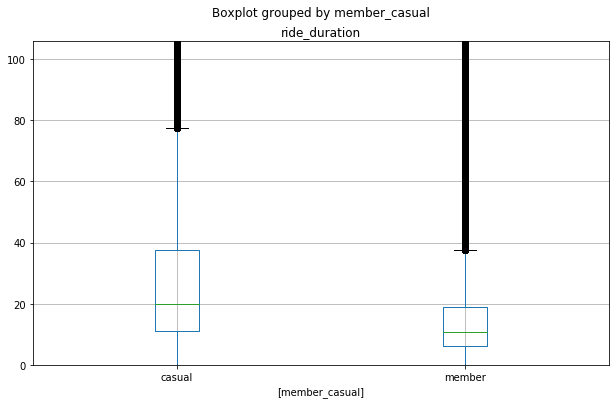

In [27]:
used_df.boxplot(column=['ride_duration'], by=['member_casual'], figsize=(10, 6), labels=['casual', 'member'])
plt.ylim([0, 106])

In [9]:
a = used_df[used_df['member_casual'] == 'member']['ride_duration']
b = used_df[used_df['member_casual'] == 'casual']['ride_duration']

for i in range(20, 31, 1):
    result = stats.ttest_ind(a+i, b, equal_var=False)
    print("Result of ttest with MEMBER smaller than CASUAL by " + str(i))
    print(result)
    print("--------------------------------------------")

Result of ttest with MEMBER smaller than CASUAL by 20
Ttest_indResult(statistic=-24.051671515402397, pvalue=8.405523256745963e-128)
--------------------------------------------
Result of ttest with MEMBER smaller than CASUAL by 21
Ttest_indResult(statistic=-20.6162557643706, pvalue=2.0123074879277126e-94)
--------------------------------------------
Result of ttest with MEMBER smaller than CASUAL by 22
Ttest_indResult(statistic=-17.18084001333883, pvalue=3.74103061201846e-66)
--------------------------------------------
Result of ttest with MEMBER smaller than CASUAL by 23
Ttest_indResult(statistic=-13.745424262307031, pvalue=5.452971519675526e-43)
--------------------------------------------
Result of ttest with MEMBER smaller than CASUAL by 24
Ttest_indResult(statistic=-10.310008511275235, pvalue=6.3598455600535765e-25)
--------------------------------------------
Result of ttest with MEMBER smaller than CASUAL by 25
Ttest_indResult(statistic=-6.874592760243463, pvalue=6.218752356394

### 4.1. Examine the relationship of rides and starting time

Insight of time

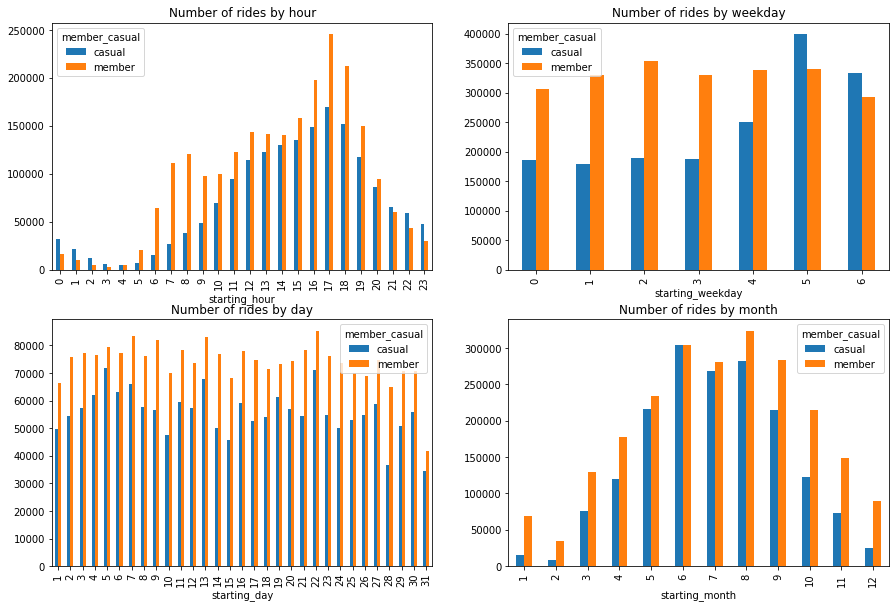

In [10]:
# Number of rides and starting time

num_ride_by_hour = pd.pivot_table(used_df, values='ride_id', index=['starting_hour'], 
                                  columns=['member_casual'], aggfunc='count')
num_ride_by_weekday = pd.pivot_table(used_df, values='ride_id', index=['starting_weekday'], 
                                     columns=['member_casual'], aggfunc='count')
num_ride_by_day = pd.pivot_table(used_df, values='ride_id', index=['starting_day'], 
                                   columns=['member_casual'], aggfunc='count')
num_ride_by_month = pd.pivot_table(used_df, values='ride_id', index=['starting_month'], 
                                   columns=['member_casual'], aggfunc='count')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

num_ride_by_hour.plot.bar(ax=axes[0, 0], title="Number of rides by hour")
num_ride_by_weekday.plot.bar(ax=axes[0, 1], title="Number of rides by weekday")
num_ride_by_day.plot.bar(ax=axes[1, 0], title="Number of rides by day")
num_ride_by_month.plot.bar(ax=axes[1, 1], title="Number of rides by month")

In [11]:
# Chi-square test for independence between starting time and casual-member category

stat, p, dof, expected = stats.chi2_contingency(num_ride_by_hour[['casual', 'member']])
print("Chi-square test result independence between hour and casual-member")
print("T-statistics: " + str(stat))
print("P-value: " + str(p))
print("--------------------------------------------")

stat, p, dof, expected = stats.chi2_contingency(num_ride_by_weekday[['casual', 'member']])
print("Chi-square test result independence between weekday and casual-member")
print("T-statistics: " + str(stat))
print("P-value: " + str(p))
print("--------------------------------------------")

stat, p, dof, expected = stats.chi2_contingency(num_ride_by_day[['casual', 'member']])
print("Chi-square test result independence between day of month and casual-member")
print("T-statistics: " + str(stat))
print("P-value: " + str(p))
print("--------------------------------------------")

stat, p, dof, expected = stats.chi2_contingency(num_ride_by_month[['casual', 'member']])
print("Chi-square test result independence between month and casual-member")
print("T-statistics: " + str(stat))
print("P-value: " + str(p))
print("--------------------------------------------")

Chi-square test result independence between hour and casual-member
T-statistics: 143571.35273945716
P-value: 0.0
--------------------------------------------
Chi-square test result independence between weekday and casual-member
T-statistics: 105745.0230139757
P-value: 0.0
--------------------------------------------
Chi-square test result independence between day of month and casual-member
T-statistics: 7549.954078590766
P-value: 0.0
--------------------------------------------
Chi-square test result independence between month and casual-member
T-statistics: 99895.01893315685
P-value: 0.0
--------------------------------------------


Text(0.5, 1, 'Casual rides by hour and weekday')

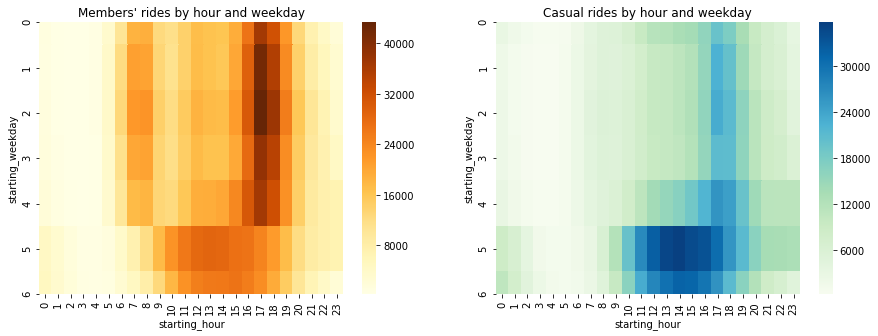

In [12]:
# Number of rides by hour with weekday

casual_ride_weekday = pd.pivot_table(used_df[used_df['member_casual'] == 'casual'], values='ride_id', 
                                     index=['starting_weekday'], columns=['starting_hour'], aggfunc='count')
member_ride_weekday = pd.pivot_table(used_df[used_df['member_casual'] == 'member'], values='ride_id', 
                                     index=['starting_weekday'], columns=['starting_hour'], aggfunc='count')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(member_ride_weekday, cmap='YlOrBr', ax=axes[0])
sns.heatmap(casual_ride_weekday, cmap='GnBu', ax=axes[1])

axes[0].set_title("Members' rides by hour and weekday")
axes[1].set_title("Casual rides by hour and weekday")

Text(0.5, 1, 'Casual rides by hour and month')

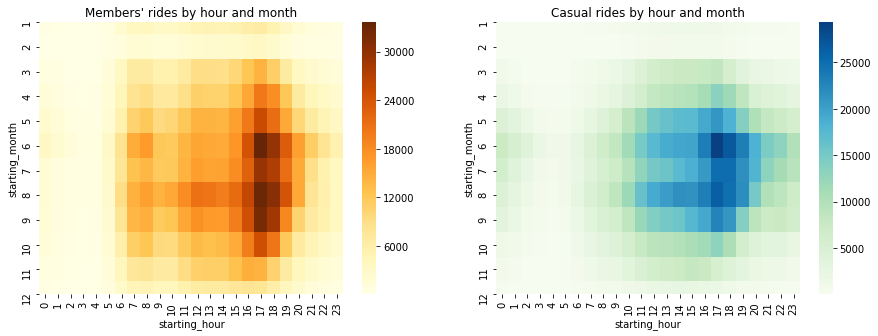

In [13]:
# Number of rides by hour with month

casual_ride_month = pd.pivot_table(used_df[used_df['member_casual'] == 'casual'], values='ride_id', 
                                     index=['starting_month'], columns=['starting_hour'], aggfunc='count')
member_ride_month = pd.pivot_table(used_df[used_df['member_casual'] == 'member'], values='ride_id', 
                                     index=['starting_month'], columns=['starting_hour'], aggfunc='count')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(member_ride_month, cmap='YlOrBr', ax=axes[0])
sns.heatmap(casual_ride_month, cmap='GnBu', ax=axes[1])

axes[0].set_title("Members' rides by hour and month")
axes[1].set_title("Casual rides by hour and month")

Text(0.5, 1, 'Casual rides by day and month')

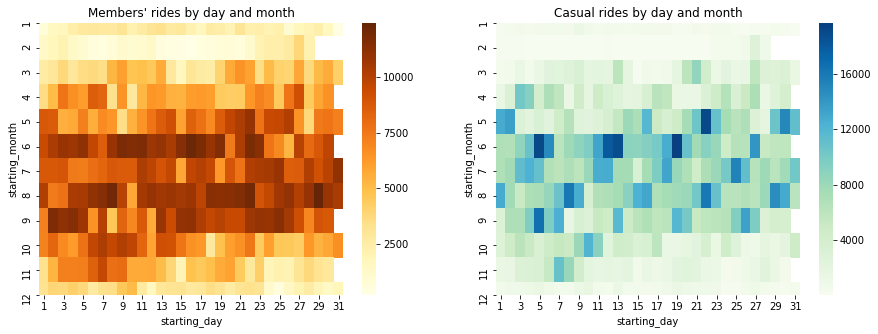

In [14]:
# Number of rides by day with month

casual_ride_day_month = pd.pivot_table(used_df[used_df['member_casual'] == 'casual'], values='ride_id', 
                                     index=['starting_month'], columns=['starting_day'], aggfunc='count')
member_ride_day_month = pd.pivot_table(used_df[used_df['member_casual'] == 'member'], values='ride_id', 
                                     index=['starting_month'], columns=['starting_day'], aggfunc='count')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(member_ride_day_month, cmap='YlOrBr', ax=axes[0])
sns.heatmap(casual_ride_day_month, cmap='GnBu', ax=axes[1])

axes[0].set_title("Members' rides by day and month")
axes[1].set_title("Casual rides by day and month")

Examine time with ride length

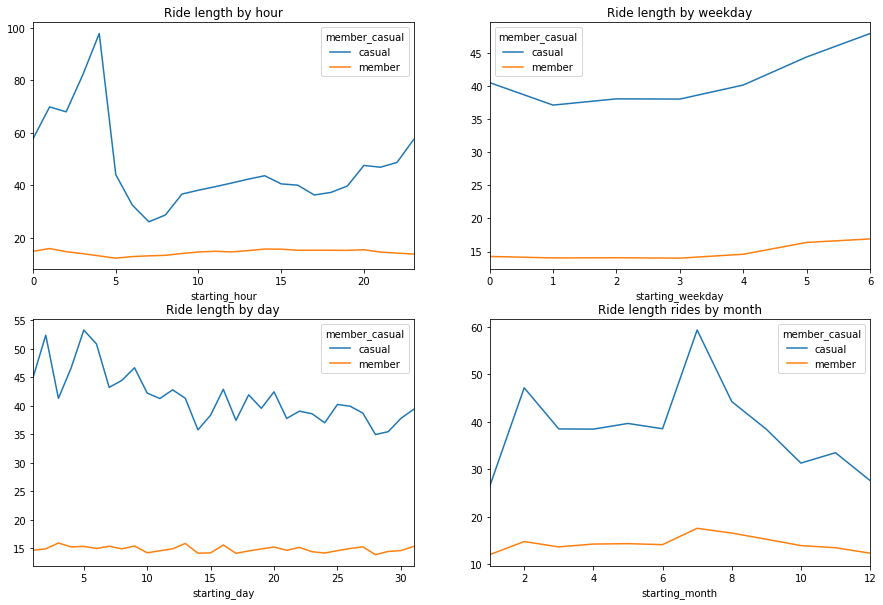

In [15]:
# Ride length and starting time

mean_length_by_hour = pd.pivot_table(used_df, values='ride_duration', index=['starting_hour'], 
                                  columns=['member_casual'], aggfunc='mean')
mean_length_by_weekday = pd.pivot_table(used_df, values='ride_duration', index=['starting_weekday'], 
                                     columns=['member_casual'], aggfunc='mean')
mean_length_by_day = pd.pivot_table(used_df, values='ride_duration', index=['starting_day'], 
                                   columns=['member_casual'], aggfunc='mean')
mean_length_by_month = pd.pivot_table(used_df, values='ride_duration', index=['starting_month'], 
                                   columns=['member_casual'], aggfunc='mean')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

mean_length_by_hour.plot(ax=axes[0, 0], title="Ride length by hour")
mean_length_by_weekday.plot(ax=axes[0, 1], title="Ride length by weekday")
mean_length_by_day.plot(ax=axes[1, 0], title="Ride length by day")
mean_length_by_month.plot(ax=axes[1, 1], title="Ride length rides by month")

Text(0.5, 1, 'Casual ride length by hour and weekday')

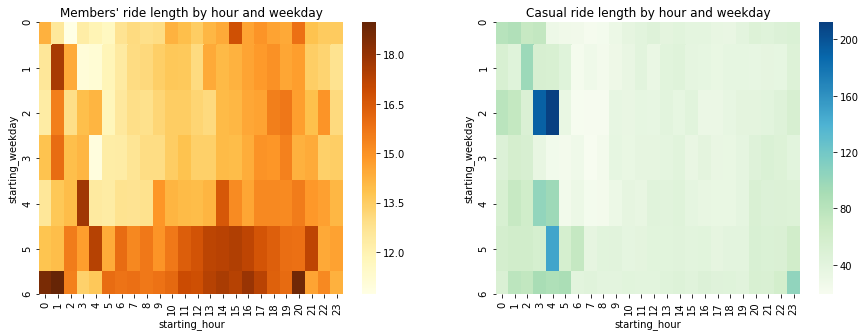

In [16]:
# Ride length by hour with weekday

casual_mean_length_weekday = pd.pivot_table(used_df[used_df['member_casual'] == 'casual'], values='ride_duration', 
                                     index=['starting_weekday'], columns=['starting_hour'], aggfunc='mean')
member_mean_length_weekday = pd.pivot_table(used_df[used_df['member_casual'] == 'member'], values='ride_duration', 
                                     index=['starting_weekday'], columns=['starting_hour'], aggfunc='mean')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(member_mean_length_weekday, cmap='YlOrBr', ax=axes[0])
sns.heatmap(casual_mean_length_weekday, cmap='GnBu', ax=axes[1])

axes[0].set_title("Members' ride length by hour and weekday")
axes[1].set_title("Casual ride length by hour and weekday")

Text(0.5, 1, 'Casual ride length by hour and month')

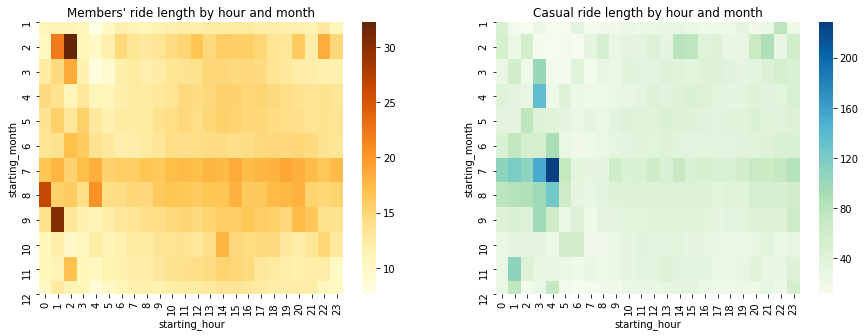

In [17]:
# Ride length by hour with month

casual_mean_length_month = pd.pivot_table(used_df[used_df['member_casual'] == 'casual'], values='ride_duration', 
                                     index=['starting_month'], columns=['starting_hour'], aggfunc='mean')
member_mean_length_month = pd.pivot_table(used_df[used_df['member_casual'] == 'member'], values='ride_duration', 
                                     index=['starting_month'], columns=['starting_hour'], aggfunc='mean')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(member_mean_length_month, cmap='YlOrBr', ax=axes[0])
sns.heatmap(casual_mean_length_month, cmap='GnBu', ax=axes[1])

axes[0].set_title("Members' ride length by hour and month")
axes[1].set_title("Casual ride length by hour and month")

Text(0.5, 1, 'Casual ride length by day and month')

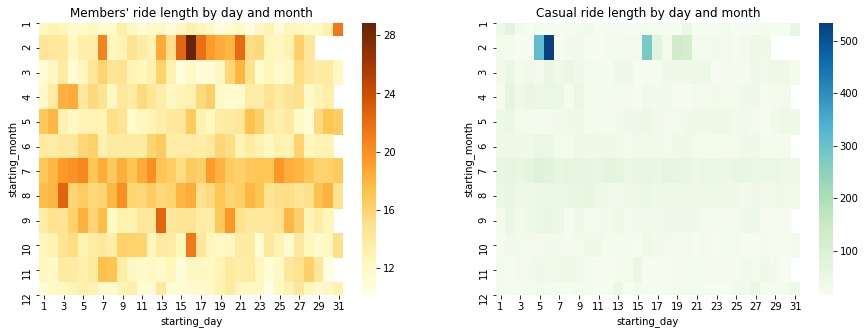

In [18]:
# Ride length by day with month

casual_mean_length_day_month = pd.pivot_table(used_df[used_df['member_casual'] == 'casual'], values='ride_duration', 
                                     index=['starting_month'], columns=['starting_day'], aggfunc='mean')
member_mean_length_day_month = pd.pivot_table(used_df[used_df['member_casual'] == 'member'], values='ride_duration', 
                                     index=['starting_month'], columns=['starting_day'], aggfunc='mean')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(member_mean_length_day_month, cmap='YlOrBr', ax=axes[0])
sns.heatmap(casual_mean_length_day_month, cmap='GnBu', ax=axes[1])

axes[0].set_title("Members' ride length by day and month")
axes[1].set_title("Casual ride length by day and month")

### 4.3. Examine the relationships of rides and types of bikes

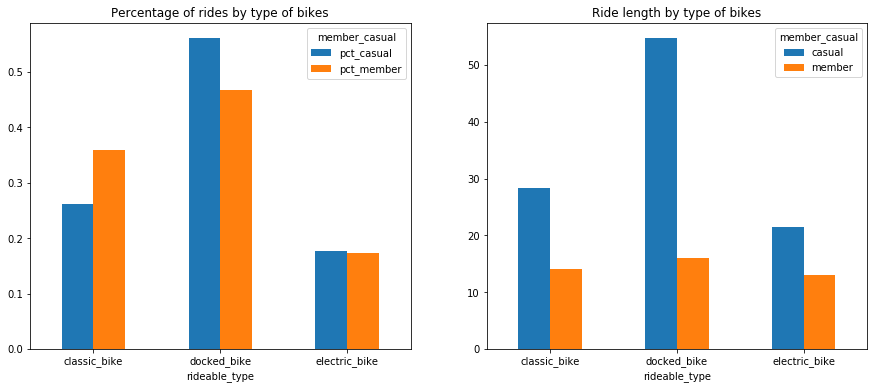

In [28]:
num_ride_by_type = pd.pivot_table(used_df, values='ride_id', index=['rideable_type'], 
                                  columns=['member_casual'], aggfunc='count')
num_ride_by_type['pct_casual'] = num_ride_by_type['casual'] / num_ride_by_type['casual'].sum()
num_ride_by_type['pct_member'] = num_ride_by_type['member'] / num_ride_by_type['member'].sum()
mean_length_by_type = pd.pivot_table(used_df, values='ride_duration', index=['rideable_type'], 
                                     columns=['member_casual'], aggfunc='mean')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
num_ride_by_type[['pct_casual', 'pct_member']].plot.bar(ax=axes[0], title="Percentage of rides by type of bikes", rot=360)
mean_length_by_type.plot.bar(ax=axes[1], title="Ride length by type of bikes", rot=360)

### 4.4. Examine the relationships of rides and station locations

- Places that casual riders come are entertainment places
- Need to visualization on Tableau to see clearly

In [51]:
start_station = used_df[['start_station_name', 'start_lat', 'start_lng']].groupby('start_station_name').mean()
start_station['num_of_member_ride'] = used_df[used_df['member_casual'] == 'member'].groupby('start_station_name')['ride_id'].count()
start_station['num_of_casual_ride'] = used_df[used_df['member_casual'] == 'casual'].groupby('start_station_name')['ride_id'].count()
start_station['mean_length_member_ride'] = used_df[used_df['member_casual'] == 'member'].groupby('start_station_name')['ride_duration'].mean()
start_station['mean_length_casual_ride'] = used_df[used_df['member_casual'] == 'casual'].groupby('start_station_name')['ride_duration'].mean()
start_station = start_station.fillna(0)
start_station

,start_lat,start_lng,num_of_member_ride,num_of_casual_ride,mean_length_member_ride,mean_length_casual_ride
start_station_name,,,,,,
2112 W Peterson Ave,41.991177,-87.683593,593.0,297.0,18.509921,64.313692
63rd St Beach,41.781014,-87.576139,906.0,1996.0,27.444113,99.694264
900 W Harrison St,41.874753,-87.649806,3269.0,1617.0,13.234776,25.638662
Aberdeen St & Jackson Blvd,41.877730,-87.654797,7163.0,2614.0,11.878945,27.802327
Aberdeen St & Monroe St,41.880417,-87.655540,5751.0,2592.0,11.935823,39.816101
...,...,...,...,...,...,...
Woodlawn Ave & 55th St,41.795268,-87.596470,2897.0,2212.0,11.580946,49.244085
Woodlawn Ave & 75th St,41.759168,-87.595752,31.0,45.0,19.436559,62.306667
Woodlawn Ave & Lake Park Ave,41.814090,-87.597009,891.0,1046.0,18.557651,108.294965


In [71]:
fig = px.scatter_mapbox(start_station, lat='start_lat', lon='start_lng', color="num_of_member_ride", 
                        color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(width=600, height=600)
fig.update_layout(mapbox_style='open-street-map')

In [74]:
fig = px.scatter_mapbox(start_station, lat='start_lat', lon='start_lng', color="num_of_casual_ride",
                       color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(width=600, height=600)
fig.update_layout(mapbox_style='open-street-map')

In [50]:
end_station = used_df[['end_station_name', 'end_lat', 'end_lng']].groupby('end_station_name').mean()
end_station['num_of_member_ride'] = used_df[used_df['member_casual'] == 'member'].groupby('end_station_name')['ride_id'].count()
end_station['num_of_casual_ride'] = used_df[used_df['member_casual'] == 'casual'].groupby('end_station_name')['ride_id'].count()
end_station['mean_length_member_ride'] = used_df[used_df['member_casual'] == 'member'].groupby('end_station_name')['ride_duration'].mean()
end_station['mean_length_casual_ride'] = used_df[used_df['member_casual'] == 'casual'].groupby('end_station_name')['ride_duration'].mean()
end_station = end_station.fillna(0)
end_station

,end_lat,end_lng,num_of_member_ride,num_of_casual_ride,mean_length_member_ride,mean_length_casual_ride
end_station_name,,,,,,
2112 W Peterson Ave,41.991137,-87.683589,652.0,334.0,18.182285,34.877096
63rd St Beach,41.781083,-87.576166,964.0,1994.0,29.553959,59.981653
900 W Harrison St,41.874762,-87.649806,3306.0,1567.0,12.175292,26.778207
Aberdeen St & Jackson Blvd,41.877728,-87.654779,7134.0,2592.0,11.193760,26.802508
Aberdeen St & Monroe St,41.880426,-87.655506,6200.0,2401.0,12.547473,26.014404
...,...,...,...,...,...,...
Woodlawn Ave & 55th St,41.795317,-87.596481,2932.0,2160.0,12.700631,38.435941
Woodlawn Ave & 75th St,41.759163,-87.595751,22.0,35.0,18.635606,34.863333
Woodlawn Ave & Lake Park Ave,41.814109,-87.597008,783.0,1115.0,18.602980,85.152167


In [75]:
fig = px.scatter_mapbox(end_station, lat='end_lat', lon='end_lng', color="num_of_member_ride",
                       color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(width=600, height=600)
fig.update_layout(mapbox_style='open-street-map')

In [76]:
fig = px.scatter_mapbox(end_station, lat='end_lat', lon='end_lng', color="num_of_casual_ride",
                       color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(width=600, height=600)
fig.update_layout(mapbox_style='open-street-map')